In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#cargar archivo desde seaborn 
df=pd.read_csv('Victoria_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/19898,Duchess Suite,No se proporciona descripción,No se proporcionan detalles,https://a0.muscache.com/pictures/101822/ae950f...,Ryan,2010-01-11,Desconocido,-%,f,...,5.00,5.00,5.00,4.90,4.80,1.0,0.0,0.0,0.0,1.90
1,https://www.airbnb.com/rooms/83515,GALLERY B&B SUITE,A quiet and sunny suite with a private entranc...,"Our property has gardens, an orchard, a pond a...",https://a0.muscache.com/pictures/6110737/930db...,Celia,2011-03-21,within an hour,100%,t,...,4.87,4.92,4.84,4.94,4.75,2.0,2.0,0.0,0.0,0.90
2,https://www.airbnb.com/rooms/168460,Perfectly located lovely home,"Wonderful neighborhood, two blocks to inner ha...",Lovely neighborhood with friendly neighbors su...,https://a0.muscache.com/pictures/7a2bfc51-fd59...,Deborah,2011-07-10,Desconocido,-%,f,...,4.98,4.89,4.92,5.00,4.90,1.0,1.0,0.0,0.0,0.43
3,https://www.airbnb.com/rooms/185732,Romantic 2 bedroom private suite,The unit is a 2 bedroom suite sectioned off fr...,No se proporcionan detalles,https://a0.muscache.com/pictures/20829630/9356...,Peter,2011-07-27,a few days or more,10%,f,...,4.65,4.82,4.88,4.90,4.61,3.0,0.0,0.0,0.0,0.32
4,https://www.airbnb.com/rooms/193366,Tudor Cottage,"In the historic Rockland area of Victoria, thi...",We are surrounded by heritage homes with lovel...,https://a0.muscache.com/pictures/6145514/1eb8d...,Sandra,2011-08-07,within a few hours,75%,f,...,4.78,4.92,4.89,4.88,4.76,1.0,1.0,0.0,0.0,1.01


In [3]:
f1=df.iloc[ :  , [8,9,10,13,14,20,24,25,28,40] ]
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,-%,f,f,Private room in rental unit,Private room,f,1.0,1.0,188.5,5.00
1,100%,t,t,Entire guest suite,Entire home/apt,t,2.0,1.0,175.0,4.87
2,-%,f,f,Entire townhouse,Entire home/apt,f,3.0,1.0,200.0,4.98
3,10%,f,t,Private room in home,Private room,f,5.0,1.0,199.0,4.65
4,75%,f,t,Entire guest suite,Entire home/apt,t,6.0,1.0,135.0,4.78
...,...,...,...,...,...,...,...,...,...,...
3962,100%,f,t,Entire rental unit,Entire home/apt,t,4.0,1.0,178.0,5.00
3963,-%,f,t,Entire home,Entire home/apt,f,4.0,1.0,242.0,5.00
3964,-%,f,f,Entire guesthouse,Entire home/apt,f,4.0,1.0,155.5,5.00
3965,-%,f,t,Entire home,Entire home/apt,f,4.0,1.0,242.0,5.00


In [ ]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#f1['property_type'] = encoder.fit_transform(f1['property_type'])
#f1['property_type'] = f1['property_type'].astype(float)

frecuencias = f1['property_type'].value_counts()
f1['property_type'] = f1['property_type'].map(frecuencias)


f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

C:\Users\josse\AppData\Local\Temp\ipykernel_25800\2647041613.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\josse\AppData\Local\Temp\ipykernel_25800\2647041613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\josse\AppData\Local\Temp\ipykernel_25800\2647041613.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [5]:
#f2 = Entire home/apt
f2= f1[(f1["room_type"] == 1)]

In [6]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3351 entries, 1 to 3966
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3351 non-null   float64
 1   host_is_superhost          3351 non-null   int64  
 2   host_identity_verified     3351 non-null   int64  
 3   property_type              3351 non-null   float64
 4   room_type                  3351 non-null   int64  
 5   instant_bookable           3351 non-null   int64  
 6   accommodates               3351 non-null   float64
 7   bathrooms                  3351 non-null   float64
 8   price                      3351 non-null   float64
 9   review_scores_cleanliness  3351 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 288.0 KB


<Axes: xlabel='room_type', ylabel='price'>

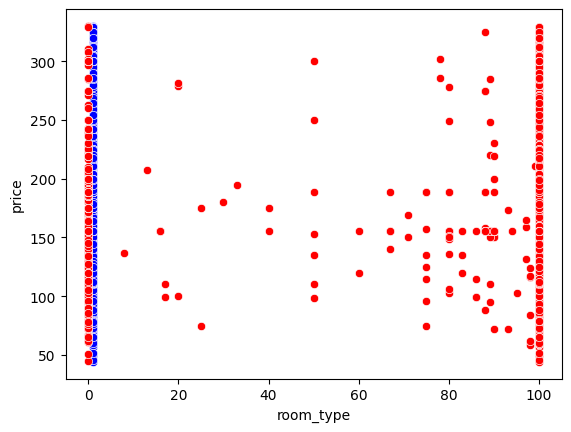

In [7]:
#imprimimos el scatter plot entre la variable dependiente total e independiente (a)
#para observar el comportamiento en su dispersión 

from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

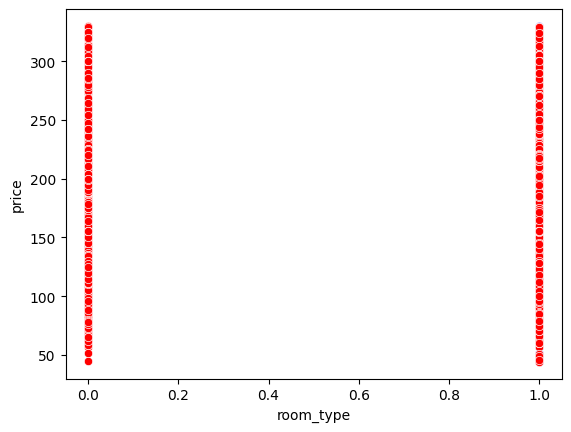

In [8]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

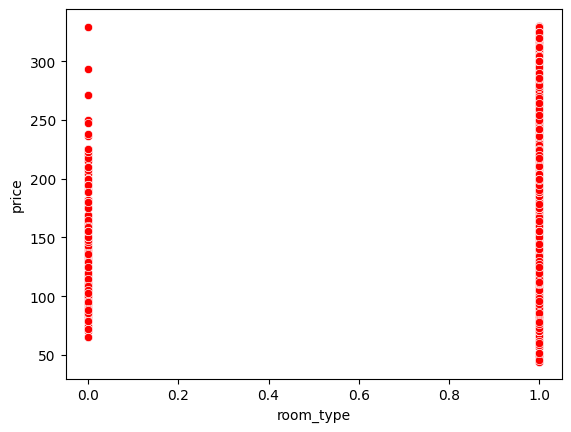

In [9]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

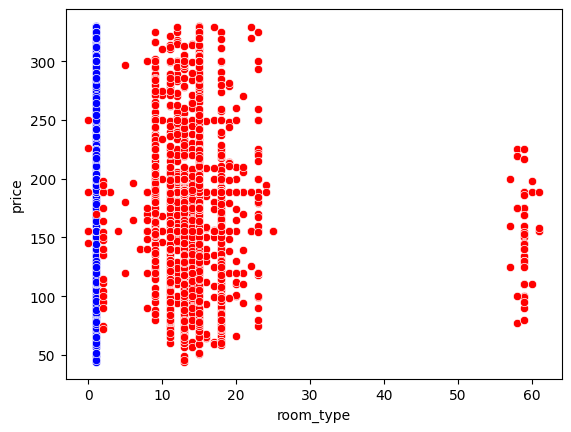

In [10]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

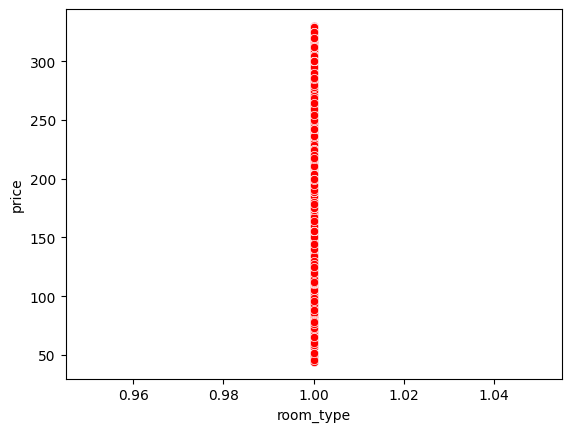

In [11]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

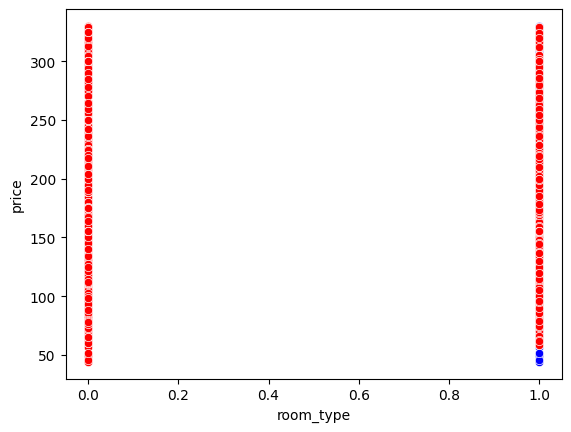

In [12]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

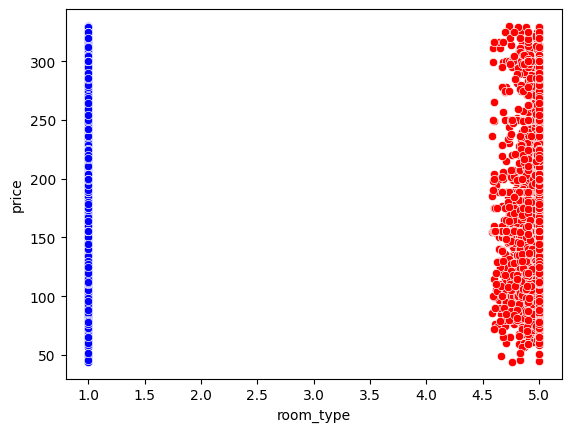

In [13]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='accommodates'>

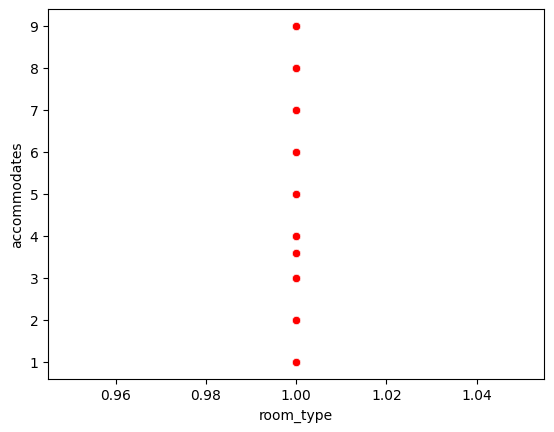

In [14]:
from turtle import color 

sns.scatterplot(x='room_type', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='accommodates', color='red', data=f2)

**DECLARACIÓN DE VARIABLES INDEPENDIENTES Y DEPENDIENTES**

In [15]:
#declaración de las variables independientes que se van a comparar con el precio 
Var_Indep= f2[['host_response_rate']]
Var_Indep2=f2[['host_is_superhost']]
Var_Indep3=f2[['room_type']]
Var_Indep4=f2[['host_identity_verified']]
Var_Indep5= f2[['property_type']]
Var_Indep6= f2[['instant_bookable']]
Var_Indep7= f2[['review_scores_cleanliness']]
#declaración de variable independiente para accommodates 
Var_Indep8= f2[['bathrooms']]

In [16]:
#variables independientes para la regresión lineal
Var_Dep= f2['price']
Var_Dep2= f2['accommodates']

**DEFINICIÓN DEL MODELO**

In [17]:
#se define model como función de regresión lineal 
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()
model4=LinearRegression()
model5=LinearRegression()
model6=LinearRegression()
model7=LinearRegression()
model8=LinearRegression()

In [18]:
#verficamos la función relacionada al modelo 
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)

sklearn.linear_model._base.LinearRegression

In [19]:
#ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)
model2.fit(X=Var_Indep2, y=Var_Dep)
model3.fit(X=Var_Indep3, y=Var_Dep)
model4.fit(X=Var_Indep4, y=Var_Dep)
model5.fit(X=Var_Indep5, y=Var_Dep)
model6.fit(X=Var_Indep6, y=Var_Dep)
model7.fit(X=Var_Indep7, y=Var_Dep)
model8.fit(X=Var_Indep8, y=Var_Dep2)

LinearRegression()

**COEFICIENTES OBTENIDOS PARA NUESTROS MODELOS**

In [20]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.1378396]),
 'rank_': 1,
 'singular_': array([2309.28541631]),
 'intercept_': np.float64(172.2756189015188)}

In [21]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.61060579]),
 'rank_': 1,
 'singular_': array([28.77918899]),
 'intercept_': np.float64(162.23547094188376)}

In [22]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(161.3443748134885)}

In [23]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([6.19451403]),
 'rank_': 1,
 'singular_': array([15.21015618]),
 'intercept_': np.float64(155.61199999999997)}

In [24]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.14684055]),
 'rank_': 1,
 'singular_': array([372.09920206]),
 'intercept_': np.float64(163.4770903228065)}

In [25]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([6.99184246]),
 'rank_': 1,
 'singular_': array([24.75187522]),
 'intercept_': np.float64(159.6605738993711)}

In [26]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.36299533]),
 'rank_': 1,
 'singular_': array([5.56393347]),
 'intercept_': np.float64(163.1300735039111)}

In [27]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(3.7997015816174273)}

**A PARTIR DE AQUÍ PREDECIMOS VALORES DE ACUERDO AL MODELO MATEMÁTICO**

**Modelo matemático y=-0.94114872x + 1327.7330443080114**

In [28]:
#predecimos valores
y_pred= model.predict(X=f2[['host_response_rate']])
y_pred

array([158.49165856, 172.2756189 , 161.93764864, ..., 172.2756189 ,
       172.2756189 , 172.2756189 ], shape=(3351,))

**Modelo matemático y=21.00986237x + 1237.7516553524084**

In [29]:
#predecimos valores
y_pred2= model2.predict(X=f2[['host_is_superhost']])
y_pred2

array([160.62486516, 162.23547094, 162.23547094, ..., 162.23547094,
       162.23547094, 162.23547094], shape=(3351,))

**Modelo matemático y=0x + 11247.1754189944133**

In [30]:
#predecimos valores
y_pred3= model3.predict(X=f2[['room_type']])
y_pred3

array([161.34437481, 161.34437481, 161.34437481, ..., 161.34437481,
       161.34437481, 161.34437481], shape=(3351,))

**Modelo matemático y=-112.80942578x + 1357.171593533486**

In [31]:
#predecimos valores
y_pred4= model4.predict(X=f2[['host_identity_verified']])
y_pred4

array([161.80651403, 155.612     , 161.80651403, ..., 155.612     ,
       161.80651403, 161.80651403], shape=(3351,))

**Modelo matemático y=-4.56100445x + 1325.0492572068565**

In [32]:
#predecimos valores
y_pred5= model5.predict(X=f2[['property_type']])
y_pred5

array([161.56816315, 160.54027928, 161.56816315, ..., 161.42132259,
       161.27448204, 160.83396038], shape=(3351,))

**Modelo matemático y=71.48464608x + 1217.0755372065255**

In [33]:
#predecimos valores
y_pred6= model6.predict(X=f2[['instant_bookable']])
y_pred6

array([166.65241636, 159.6605739 , 166.65241636, ..., 159.6605739 ,
       159.6605739 , 159.6605739 ], shape=(3351,))

**Modelo matemático y=381.28956491x + -604.4218714343112**

In [34]:
y_pred7= model7.predict(X=f2[['review_scores_cleanliness']])
y_pred7

array([161.36228627, 161.32235678, 161.39495585, ..., 161.31509687,
       161.31509687, 161.31509687], shape=(3351,))

**Modelo matemático y=0.97488088x + 2.1063441944025767**

In [35]:
y_pred8= model8.predict(X=f2[['bathrooms']])
y_pred8

array([3.79970158, 3.79970158, 3.79970158, ..., 3.79970158, 3.79970158,
       3.79970158], shape=(3351,))

**INSERTAMOS LA COLUMNA DE PREDICCIONES A NUESTRO DATAFRAME**

In [36]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(0, 'Prediccion_host_response_rate', y_pred)
f2

,Prediccion_host_response_rate,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
1,158.491659,100.0,1,1,13.0,1,1,2.0,1.0,175.0,4.87
2,172.275619,0.0,0,0,20.0,1,0,3.0,1.0,200.0,4.98
4,161.937649,75.0,0,1,13.0,1,1,6.0,1.0,135.0,4.78
7,158.491659,100.0,0,1,9.0,1,1,2.0,1.0,146.0,4.85
8,158.491659,100.0,1,1,15.0,1,0,3.0,1.0,110.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...
3962,158.491659,100.0,0,1,18.0,1,1,4.0,1.0,178.0,5.00
3963,172.275619,0.0,0,1,15.0,1,0,4.0,1.0,242.0,5.00
3964,172.275619,0.0,0,0,14.0,1,0,4.0,1.0,155.5,5.00
3965,172.275619,0.0,0,1,15.0,1,0,4.0,1.0,242.0,5.00


In [37]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(1, 'Prediccion_host_is_superhost', y_pred2)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
1,158.491659,160.624865,100.0,1,1,13.0,1,1,2.0,1.0,175.0,4.87
2,172.275619,162.235471,0.0,0,0,20.0,1,0,3.0,1.0,200.0,4.98
4,161.937649,162.235471,75.0,0,1,13.0,1,1,6.0,1.0,135.0,4.78
7,158.491659,162.235471,100.0,0,1,9.0,1,1,2.0,1.0,146.0,4.85
8,158.491659,160.624865,100.0,1,1,15.0,1,0,3.0,1.0,110.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...
3962,158.491659,162.235471,100.0,0,1,18.0,1,1,4.0,1.0,178.0,5.00
3963,172.275619,162.235471,0.0,0,1,15.0,1,0,4.0,1.0,242.0,5.00
3964,172.275619,162.235471,0.0,0,0,14.0,1,0,4.0,1.0,155.5,5.00
3965,172.275619,162.235471,0.0,0,1,15.0,1,0,4.0,1.0,242.0,5.00


In [38]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(2, 'Prediccion_room_type', y_pred3)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
1,158.491659,160.624865,161.344375,100.0,1,1,13.0,1,1,2.0,1.0,175.0,4.87
2,172.275619,162.235471,161.344375,0.0,0,0,20.0,1,0,3.0,1.0,200.0,4.98
4,161.937649,162.235471,161.344375,75.0,0,1,13.0,1,1,6.0,1.0,135.0,4.78
7,158.491659,162.235471,161.344375,100.0,0,1,9.0,1,1,2.0,1.0,146.0,4.85
8,158.491659,160.624865,161.344375,100.0,1,1,15.0,1,0,3.0,1.0,110.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,158.491659,162.235471,161.344375,100.0,0,1,18.0,1,1,4.0,1.0,178.0,5.00
3963,172.275619,162.235471,161.344375,0.0,0,1,15.0,1,0,4.0,1.0,242.0,5.00
3964,172.275619,162.235471,161.344375,0.0,0,0,14.0,1,0,4.0,1.0,155.5,5.00
3965,172.275619,162.235471,161.344375,0.0,0,1,15.0,1,0,4.0,1.0,242.0,5.00


In [39]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(3, 'Prediccion_host_identity_verified', y_pred4)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
1,158.491659,160.624865,161.344375,161.806514,100.0,1,1,13.0,1,1,2.0,1.0,175.0,4.87
2,172.275619,162.235471,161.344375,155.612000,0.0,0,0,20.0,1,0,3.0,1.0,200.0,4.98
4,161.937649,162.235471,161.344375,161.806514,75.0,0,1,13.0,1,1,6.0,1.0,135.0,4.78
7,158.491659,162.235471,161.344375,161.806514,100.0,0,1,9.0,1,1,2.0,1.0,146.0,4.85
8,158.491659,160.624865,161.344375,161.806514,100.0,1,1,15.0,1,0,3.0,1.0,110.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,158.491659,162.235471,161.344375,161.806514,100.0,0,1,18.0,1,1,4.0,1.0,178.0,5.00
3963,172.275619,162.235471,161.344375,161.806514,0.0,0,1,15.0,1,0,4.0,1.0,242.0,5.00
3964,172.275619,162.235471,161.344375,155.612000,0.0,0,0,14.0,1,0,4.0,1.0,155.5,5.00
3965,172.275619,162.235471,161.344375,161.806514,0.0,0,1,15.0,1,0,4.0,1.0,242.0,5.00


In [40]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(4, 'Prediccion_property_type', y_pred5)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
1,158.491659,160.624865,161.344375,161.806514,161.568163,100.0,1,1,13.0,1,1,2.0,1.0,175.0,4.87
2,172.275619,162.235471,161.344375,155.612000,160.540279,0.0,0,0,20.0,1,0,3.0,1.0,200.0,4.98
4,161.937649,162.235471,161.344375,161.806514,161.568163,75.0,0,1,13.0,1,1,6.0,1.0,135.0,4.78
7,158.491659,162.235471,161.344375,161.806514,162.155525,100.0,0,1,9.0,1,1,2.0,1.0,146.0,4.85
8,158.491659,160.624865,161.344375,161.806514,161.274482,100.0,1,1,15.0,1,0,3.0,1.0,110.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,158.491659,162.235471,161.344375,161.806514,160.833960,100.0,0,1,18.0,1,1,4.0,1.0,178.0,5.00
3963,172.275619,162.235471,161.344375,161.806514,161.274482,0.0,0,1,15.0,1,0,4.0,1.0,242.0,5.00
3964,172.275619,162.235471,161.344375,155.612000,161.421323,0.0,0,0,14.0,1,0,4.0,1.0,155.5,5.00
3965,172.275619,162.235471,161.344375,161.806514,161.274482,0.0,0,1,15.0,1,0,4.0,1.0,242.0,5.00


In [41]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(5, 'Prediccion_instant_bookable', y_pred6)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
1,158.491659,160.624865,161.344375,161.806514,161.568163,166.652416,100.0,1,1,13.0,1,1,2.0,1.0,175.0,4.87
2,172.275619,162.235471,161.344375,155.612000,160.540279,159.660574,0.0,0,0,20.0,1,0,3.0,1.0,200.0,4.98
4,161.937649,162.235471,161.344375,161.806514,161.568163,166.652416,75.0,0,1,13.0,1,1,6.0,1.0,135.0,4.78
7,158.491659,162.235471,161.344375,161.806514,162.155525,166.652416,100.0,0,1,9.0,1,1,2.0,1.0,146.0,4.85
8,158.491659,160.624865,161.344375,161.806514,161.274482,159.660574,100.0,1,1,15.0,1,0,3.0,1.0,110.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,158.491659,162.235471,161.344375,161.806514,160.833960,166.652416,100.0,0,1,18.0,1,1,4.0,1.0,178.0,5.00
3963,172.275619,162.235471,161.344375,161.806514,161.274482,159.660574,0.0,0,1,15.0,1,0,4.0,1.0,242.0,5.00
3964,172.275619,162.235471,161.344375,155.612000,161.421323,159.660574,0.0,0,0,14.0,1,0,4.0,1.0,155.5,5.00
3965,172.275619,162.235471,161.344375,161.806514,161.274482,159.660574,0.0,0,1,15.0,1,0,4.0,1.0,242.0,5.00


In [42]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(6, 'Prediccion_review_scores_cleanliness', y_pred7)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
1,158.491659,160.624865,161.344375,161.806514,161.568163,166.652416,161.362286,100.0,1,1,13.0,1,1,2.0,1.0,175.0,4.87
2,172.275619,162.235471,161.344375,155.612000,160.540279,159.660574,161.322357,0.0,0,0,20.0,1,0,3.0,1.0,200.0,4.98
4,161.937649,162.235471,161.344375,161.806514,161.568163,166.652416,161.394956,75.0,0,1,13.0,1,1,6.0,1.0,135.0,4.78
7,158.491659,162.235471,161.344375,161.806514,162.155525,166.652416,161.369546,100.0,0,1,9.0,1,1,2.0,1.0,146.0,4.85
8,158.491659,160.624865,161.344375,161.806514,161.274482,159.660574,161.351396,100.0,1,1,15.0,1,0,3.0,1.0,110.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,158.491659,162.235471,161.344375,161.806514,160.833960,166.652416,161.315097,100.0,0,1,18.0,1,1,4.0,1.0,178.0,5.00
3963,172.275619,162.235471,161.344375,161.806514,161.274482,159.660574,161.315097,0.0,0,1,15.0,1,0,4.0,1.0,242.0,5.00
3964,172.275619,162.235471,161.344375,155.612000,161.421323,159.660574,161.315097,0.0,0,0,14.0,1,0,4.0,1.0,155.5,5.00
3965,172.275619,162.235471,161.344375,161.806514,161.274482,159.660574,161.315097,0.0,0,1,15.0,1,0,4.0,1.0,242.0,5.00


In [43]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(7, 'Prediccion_bathrooms', y_pred8)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
1,158.491659,160.624865,161.344375,161.806514,161.568163,166.652416,161.362286,3.799702,100.0,1,1,13.0,1,1,2.0,1.0,175.0,4.87
2,172.275619,162.235471,161.344375,155.612000,160.540279,159.660574,161.322357,3.799702,0.0,0,0,20.0,1,0,3.0,1.0,200.0,4.98
4,161.937649,162.235471,161.344375,161.806514,161.568163,166.652416,161.394956,3.799702,75.0,0,1,13.0,1,1,6.0,1.0,135.0,4.78
7,158.491659,162.235471,161.344375,161.806514,162.155525,166.652416,161.369546,3.799702,100.0,0,1,9.0,1,1,2.0,1.0,146.0,4.85
8,158.491659,160.624865,161.344375,161.806514,161.274482,159.660574,161.351396,3.799702,100.0,1,1,15.0,1,0,3.0,1.0,110.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,158.491659,162.235471,161.344375,161.806514,160.833960,166.652416,161.315097,3.799702,100.0,0,1,18.0,1,1,4.0,1.0,178.0,5.00
3963,172.275619,162.235471,161.344375,161.806514,161.274482,159.660574,161.315097,3.799702,0.0,0,1,15.0,1,0,4.0,1.0,242.0,5.00
3964,172.275619,162.235471,161.344375,155.612000,161.421323,159.660574,161.315097,3.799702,0.0,0,0,14.0,1,0,4.0,1.0,155.5,5.00
3965,172.275619,162.235471,161.344375,161.806514,161.274482,159.660574,161.315097,3.799702,0.0,0,1,15.0,1,0,4.0,1.0,242.0,5.00


**GRÁFICAS COMPARATIVAS**

<Axes: xlabel='host_response_rate', ylabel='price'>

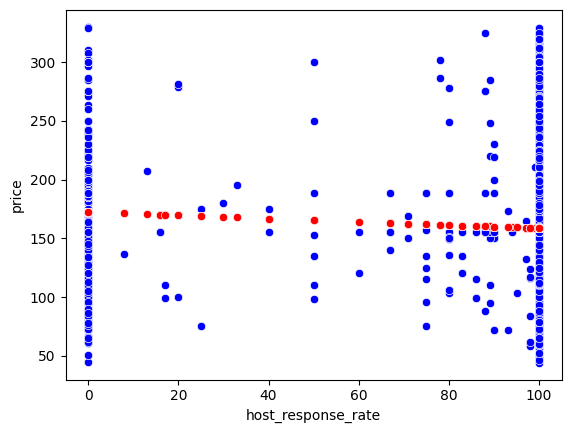

In [44]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_response_rate', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='Prediccion_host_response_rate', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

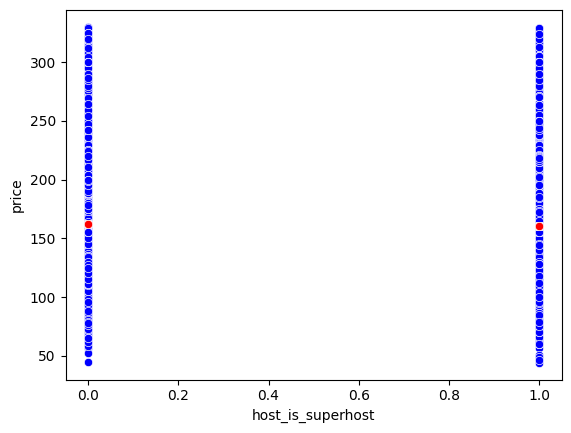

In [45]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='Prediccion_host_is_superhost', color='red', data=f2)
#sns.lineplot(x='host_is_superhost', y='Predicciones2', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

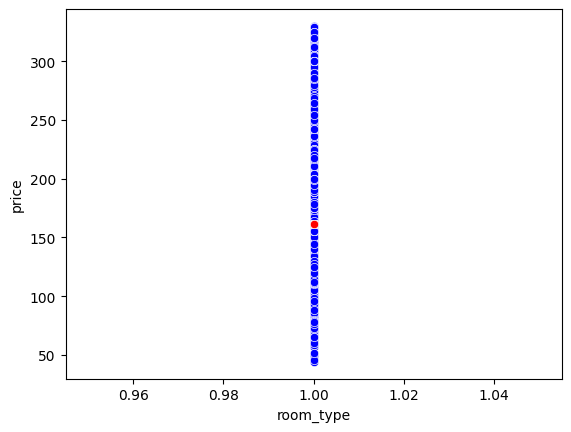

In [46]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='Prediccion_room_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

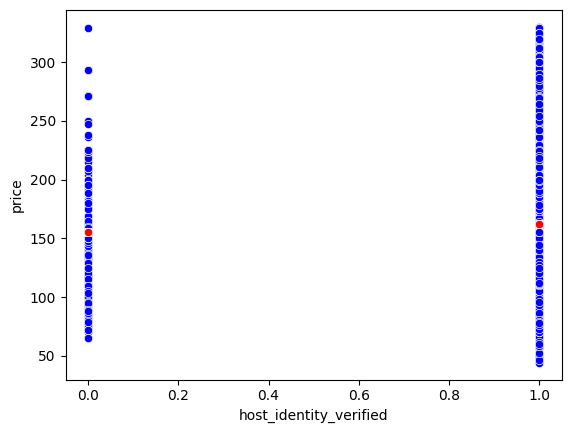

In [47]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='Prediccion_host_identity_verified', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='property_type', ylabel='price'>

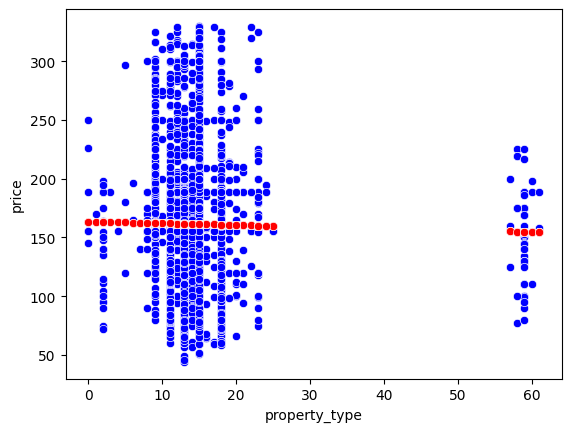

In [48]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='property_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='Prediccion_property_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

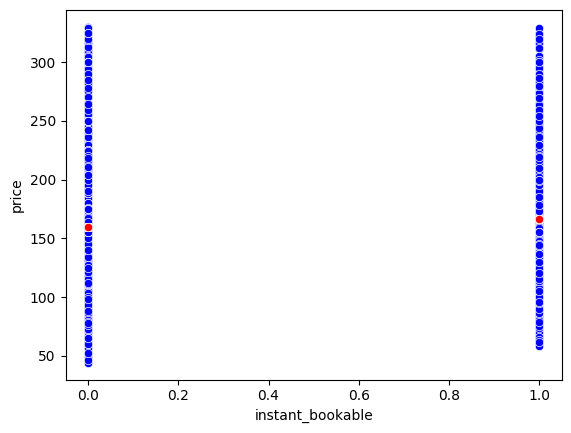

In [49]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='instant_bookable', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='Prediccion_instant_bookable', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: title={'center': 'Precio en relación a calificación de limpieza predecido'}, xlabel='review_scores_cleanliness', ylabel='price'>

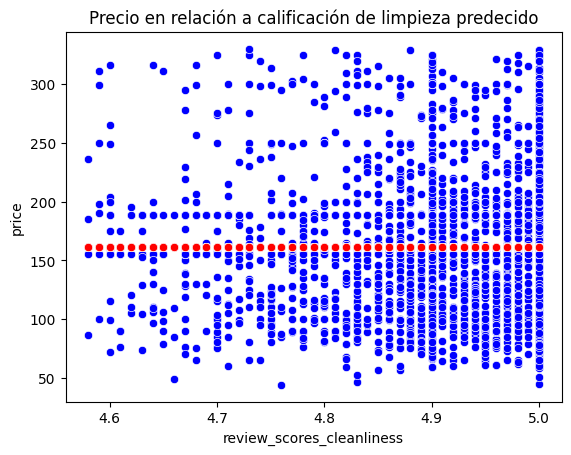

In [77]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
plt.title("Precio en relación a calificación de limpieza predecido")
sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='Prediccion_review_scores_cleanliness', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: title={'center': 'Capacidad en relación a cantidad de baños predecido'}, xlabel='bathrooms', ylabel='accommodates'>

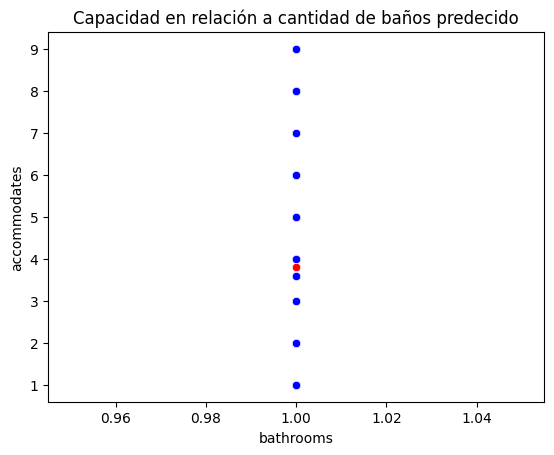

In [76]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
plt.title("Capacidad en relación a cantidad de baños predecido")
sns.scatterplot(x='bathrooms', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='Prediccion_bathrooms', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

**COEFICIENTES DE DETERMINACIÓN**

In [52]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.009870466940466893

In [53]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Var_Indep2, y=Var_Dep)
coef_Deter2

0.00020930039804711864

In [54]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Var_Indep3, y=Var_Dep)
coef_Deter3

0.0

In [55]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Var_Indep4, y=Var_Dep)
coef_Deter4

0.0008648011749159412

In [56]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Var_Indep5, y=Var_Dep)
coef_Deter5

0.00029083317024114486

In [57]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Var_Indep6, y=Var_Dep)
coef_Deter6

0.0029176549141737285

In [58]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Var_Indep7, y=Var_Dep)
coef_Deter7

3.973748390340148e-07

In [59]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Var_Indep8, y=Var_Dep2)
coef_Deter8

0.0

**COEFICIENTES DE CORRELACIÓN**

In [60]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.09935022365584736)

In [61]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.014467218047956512)

In [62]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter2)
coef_Correl3

np.float64(0.014467218047956512)

In [63]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.029407502017613486)

In [64]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.01705383154136175)

In [65]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.05401532110590224)

In [66]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.0006303767437287125)

In [67]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.0)

In [68]:
#eliminamos room_type y su prediccion 

f2= f2.drop(['room_type', 'Prediccion_room_type' ], axis=1)

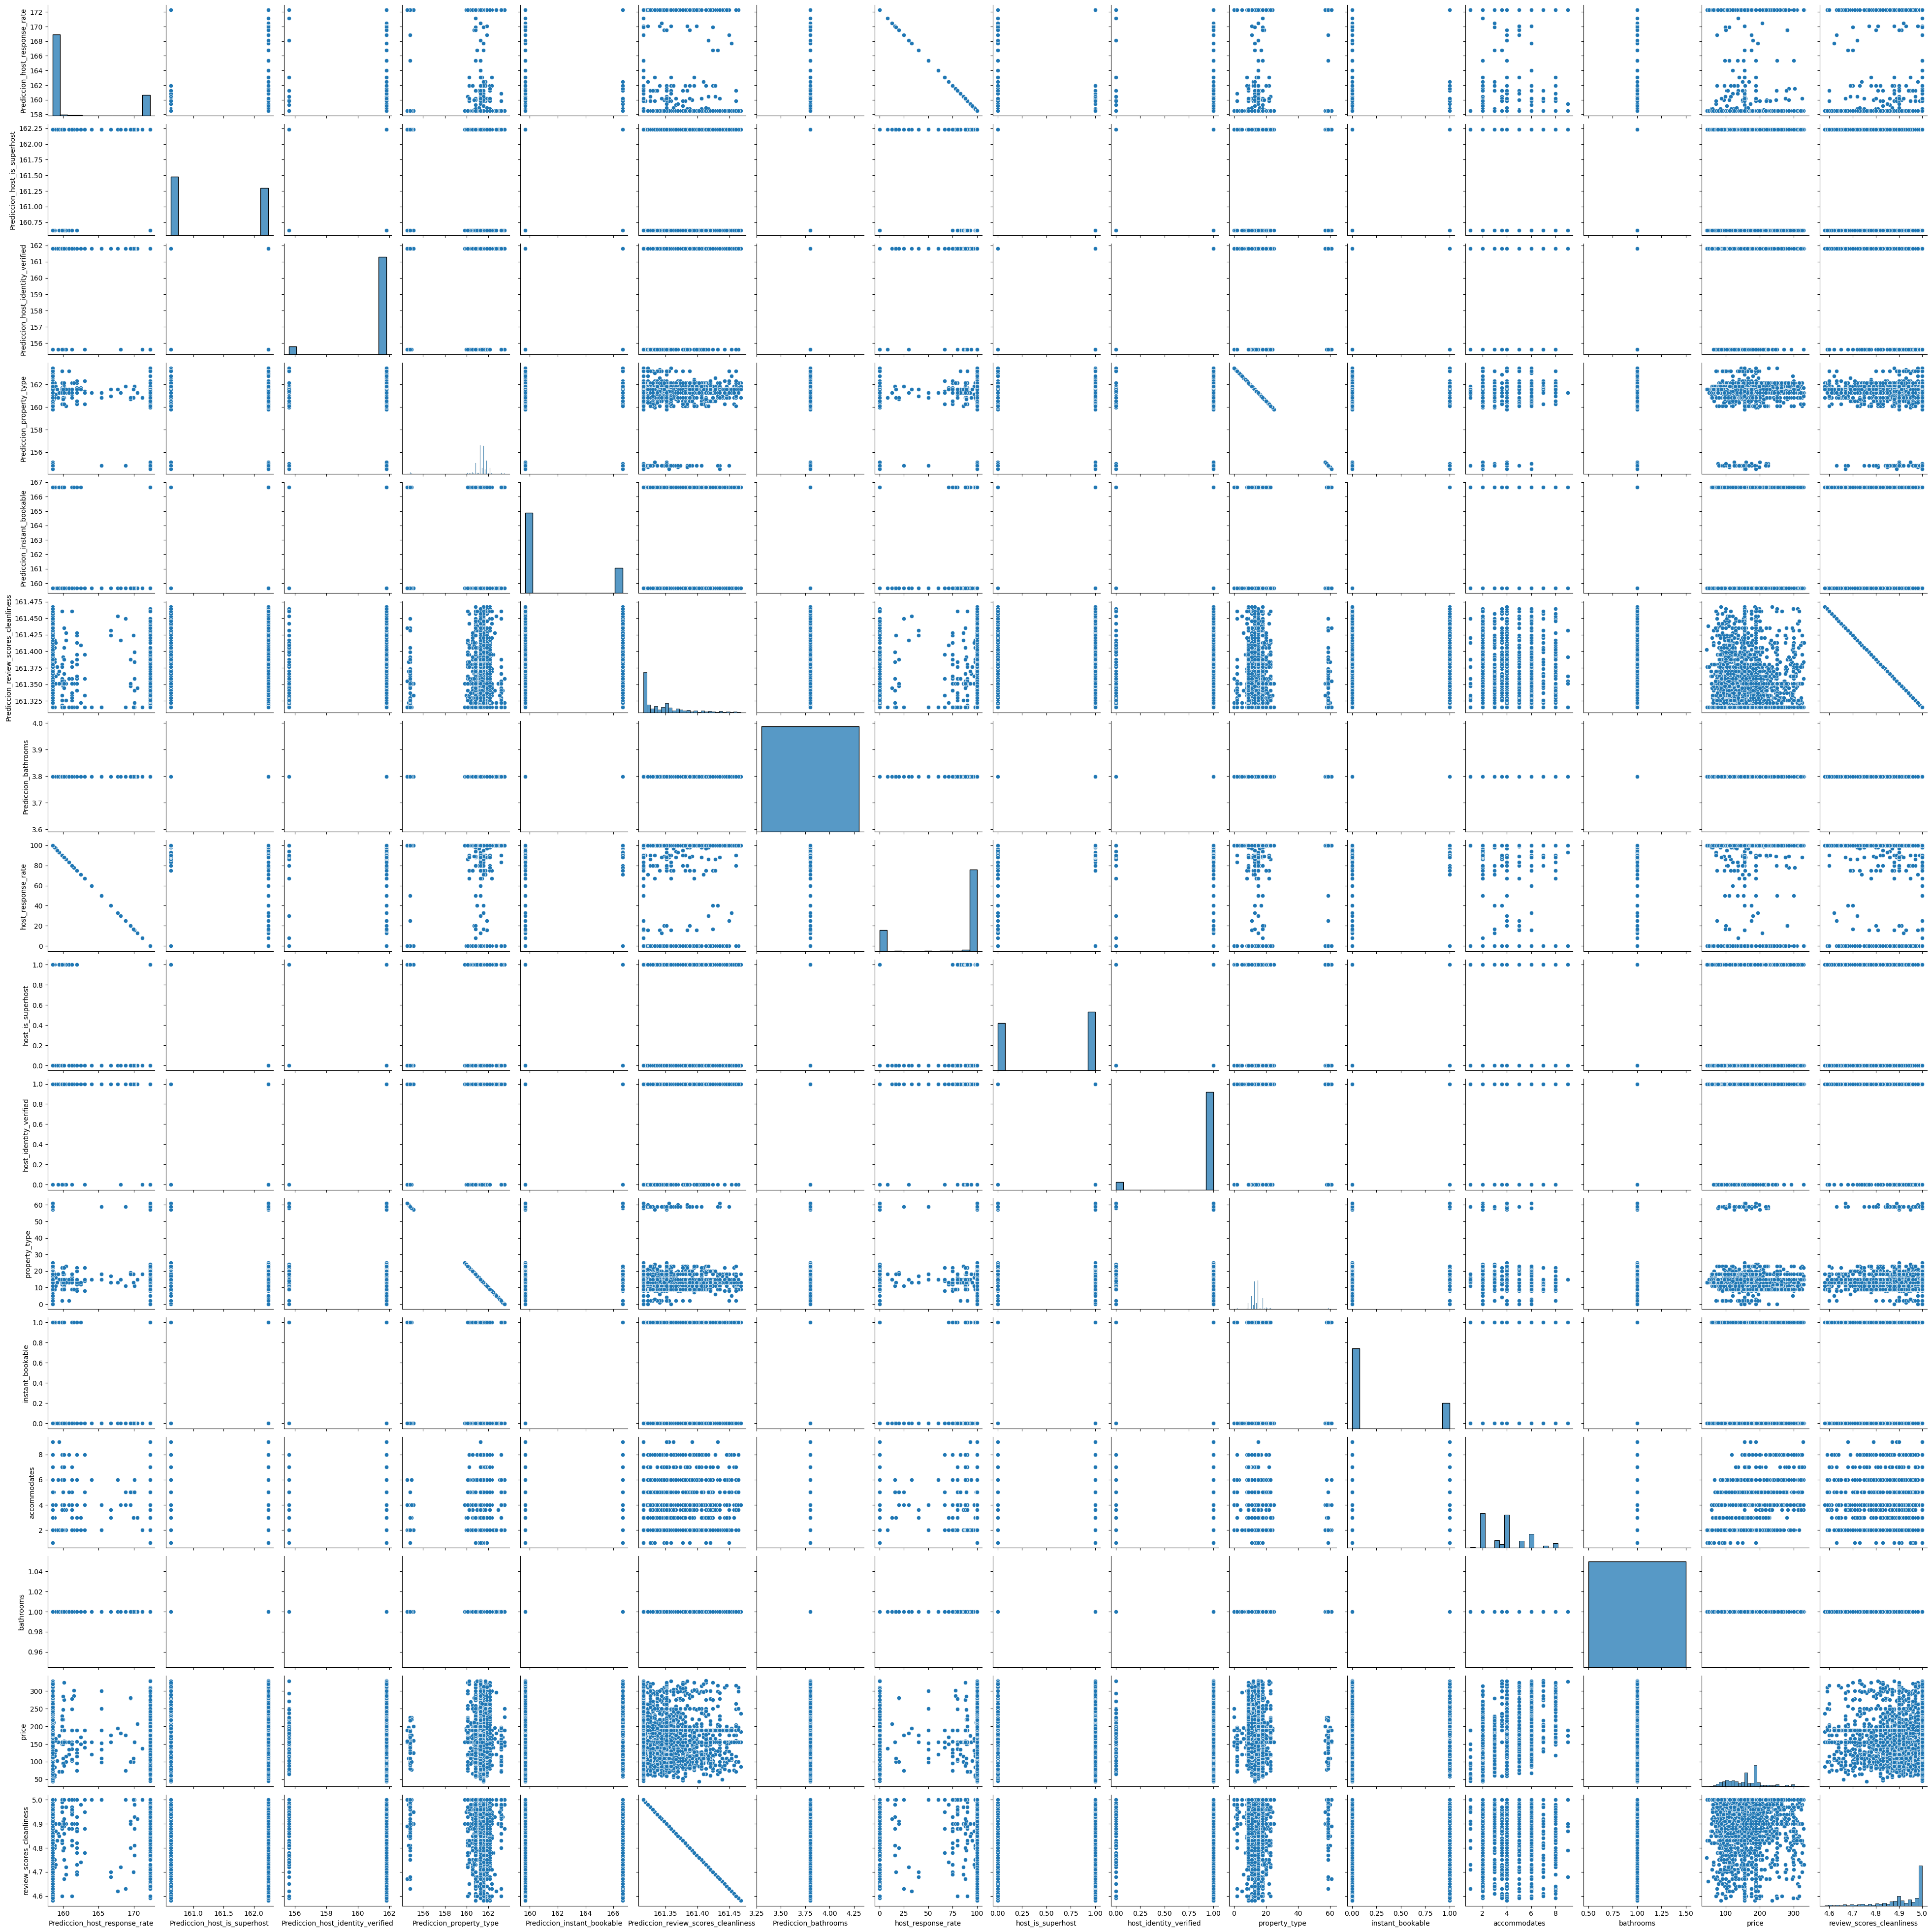

In [69]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(f2)

In [70]:
#Analizar categorias de una columna
df6 = f2.groupby(['host_response_rate'])['host_response_rate'].count()
df6

host_response_rate
0.0       660
8.0         1
13.0        1
16.0        6
17.0        2
20.0        3
25.0        2
30.0        1
33.0        1
40.0        2
50.0        7
60.0        2
67.0        4
71.0        2
75.0       16
78.0        2
80.0       13
83.0        3
86.0        4
88.0       13
89.0        8
90.0       13
93.0        2
94.0        1
95.0        1
97.0        3
98.0        8
99.0        1
100.0    2569
Name: host_response_rate, dtype: int64

In [71]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= f2.corr()
Corr_Factors

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,0.376053,-0.136145,-0.023154,-0.109039,-0.024239,NaN,-1.000000,-0.376053,-0.136145,0.023154,-0.109039,0.000517,NaN,0.099350,0.024239
Prediccion_host_is_superhost,0.376053,1.000000,-0.121802,-0.047488,-0.045643,0.044385,NaN,-0.376053,-1.000000,-0.121802,0.047488,-0.045643,0.068033,NaN,0.014467,-0.044385
Prediccion_host_identity_verified,-0.136145,-0.121802,1.000000,0.021555,0.032421,0.032898,NaN,0.136145,0.121802,1.000000,-0.021555,0.032421,0.040604,NaN,0.029408,-0.032898
Prediccion_property_type,-0.023154,-0.047488,0.021555,1.000000,-0.038014,-0.006510,NaN,0.023154,0.047488,0.021555,-1.000000,-0.038014,0.042439,NaN,0.017054,0.006510
Prediccion_instant_bookable,-0.109039,-0.045643,0.032421,-0.038014,1.000000,0.060197,NaN,0.109039,0.045643,0.032421,0.038014,1.000000,0.049486,NaN,0.054015,-0.060197
Prediccion_review_scores_cleanliness,-0.024239,0.044385,0.032898,-0.006510,0.060197,1.000000,NaN,0.024239,-0.044385,0.032898,0.006510,0.060197,0.105608,NaN,0.000630,-1.000000
Prediccion_bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,-1.000000,-0.376053,0.136145,0.023154,0.109039,0.024239,NaN,1.000000,0.376053,0.136145,-0.023154,0.109039,-0.000517,NaN,-0.099350,-0.024239
host_is_superhost,-0.376053,-1.000000,0.121802,0.047488,0.045643,-0.044385,NaN,0.376053,1.000000,0.121802,-0.047488,0.045643,-0.068033,NaN,-0.014467,0.044385
host_identity_verified,-0.136145,-0.121802,1.000000,0.021555,0.032421,0.032898,NaN,0.136145,0.121802,1.000000,-0.021555,0.032421,0.040604,NaN,0.029408,-0.032898


In [72]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,0.376053,0.136145,0.023154,0.109039,0.024239,NaN,1.000000,0.376053,0.136145,0.023154,0.109039,0.000517,NaN,0.099350,0.024239
Prediccion_host_is_superhost,0.376053,1.000000,0.121802,0.047488,0.045643,0.044385,NaN,0.376053,1.000000,0.121802,0.047488,0.045643,0.068033,NaN,0.014467,0.044385
Prediccion_host_identity_verified,0.136145,0.121802,1.000000,0.021555,0.032421,0.032898,NaN,0.136145,0.121802,1.000000,0.021555,0.032421,0.040604,NaN,0.029408,0.032898
Prediccion_property_type,0.023154,0.047488,0.021555,1.000000,0.038014,0.006510,NaN,0.023154,0.047488,0.021555,1.000000,0.038014,0.042439,NaN,0.017054,0.006510
Prediccion_instant_bookable,0.109039,0.045643,0.032421,0.038014,1.000000,0.060197,NaN,0.109039,0.045643,0.032421,0.038014,1.000000,0.049486,NaN,0.054015,0.060197
Prediccion_review_scores_cleanliness,0.024239,0.044385,0.032898,0.006510,0.060197,1.000000,NaN,0.024239,0.044385,0.032898,0.006510,0.060197,0.105608,NaN,0.000630,1.000000
Prediccion_bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,1.000000,0.376053,0.136145,0.023154,0.109039,0.024239,NaN,1.000000,0.376053,0.136145,0.023154,0.109039,0.000517,NaN,0.099350,0.024239
host_is_superhost,0.376053,1.000000,0.121802,0.047488,0.045643,0.044385,NaN,0.376053,1.000000,0.121802,0.047488,0.045643,0.068033,NaN,0.014467,0.044385
host_identity_verified,0.136145,0.121802,1.000000,0.021555,0.032421,0.032898,NaN,0.136145,0.121802,1.000000,0.021555,0.032421,0.040604,NaN,0.029408,0.032898


<Axes: >

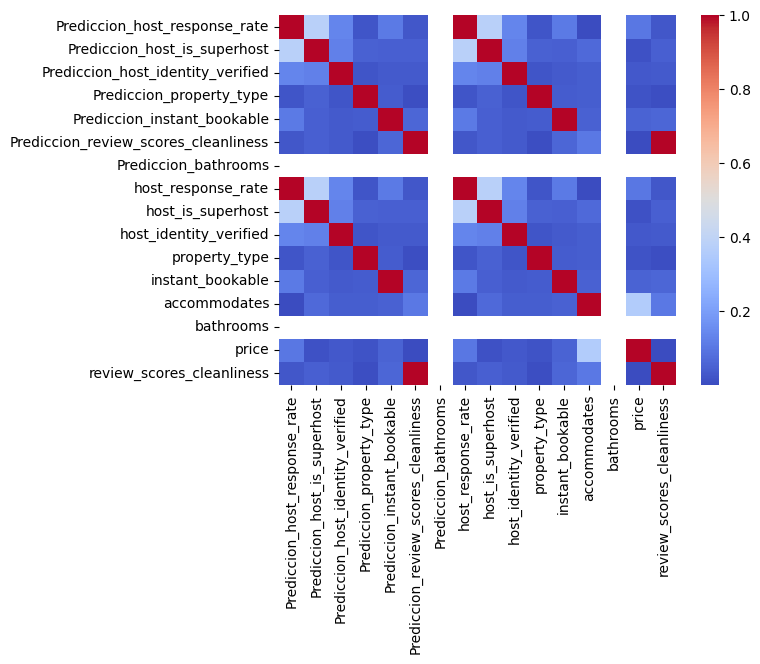

In [73]:
#Graficamos el mapa de calor de las coeficientes de correlación 
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'coolwarm')
Heart_Nap

<Axes: >

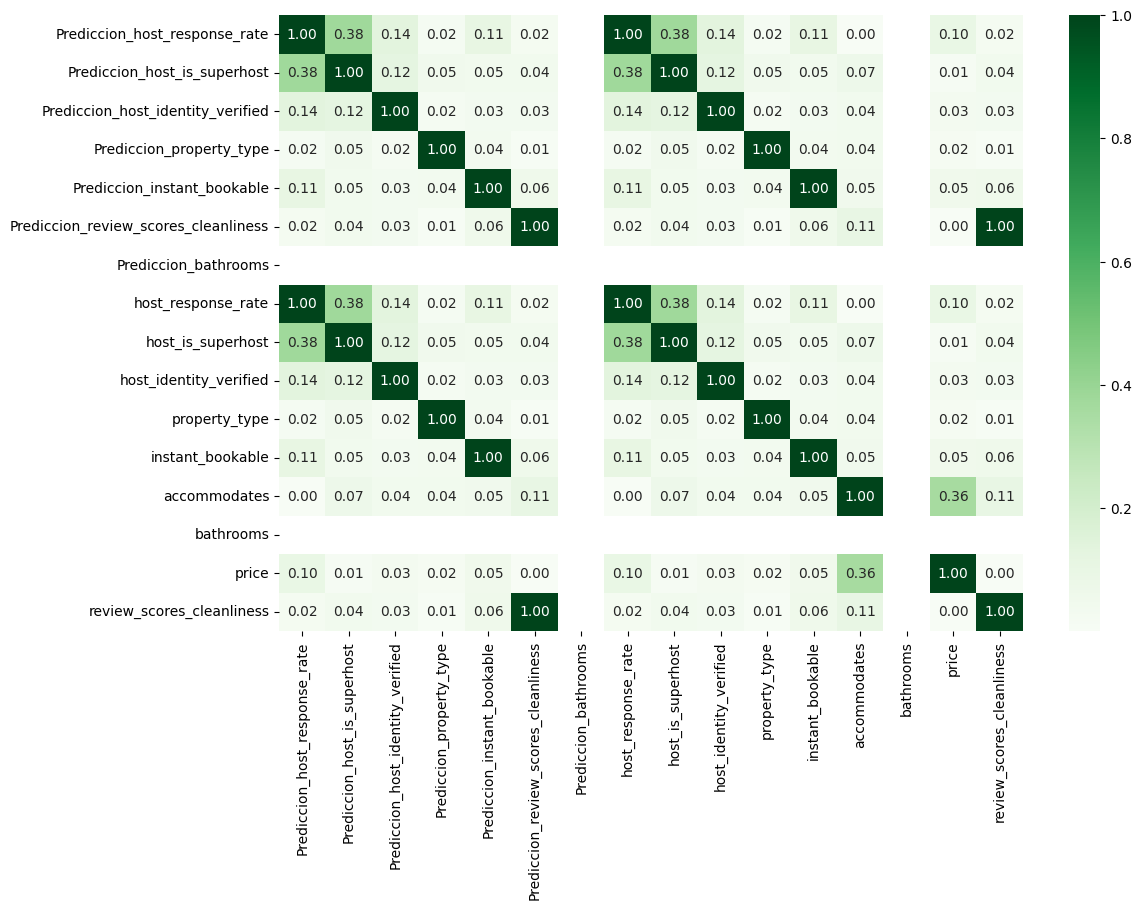

In [78]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Greens', annot=True, fmt=".2f")
Heart_Nap

In [75]:
# Obtener R² de cada modelo
r2_1 = model.score(Var_Indep, Var_Dep)
r2_2 = model2.score(Var_Indep2, Var_Dep)
r2_3 = model3.score(Var_Indep3, Var_Dep)
r2_4 = model4.score(Var_Indep4, Var_Dep)
r2_5 = model5.score(Var_Indep5, Var_Dep)
r2_6 = model6.score(Var_Indep6, Var_Dep)
r2_7 = model7.score(Var_Indep7, Var_Dep)
r2_8 = model8.score(Var_Indep8, Var_Dep2)

# Guardar los resultados en un diccionario
r2_values = {
    "host_response_rate": r2_1,
    "host_is_superhost": r2_2,
    "room_type": r2_3,
    "host_identity_verified": r2_4,
    "property_type": r2_5,
    "instant_bookable": r2_6,
    "review_scores_cleanliness": r2_7,
    "bathrooms": r2_8
}

# Ordenar y mostrar las 3 mejores variables
top_3 = sorted(r2_values.items(), key=lambda x: x[1], reverse=True)[:3]
print("Las 3 variables con mayor correlación son:")
for variable, r2 in top_3:
    print(f"{variable}: R² = {r2:.4f}")

Las 3 variables con mayor correlación son:
host_response_rate: R² = 0.0099
instant_bookable: R² = 0.0029
host_identity_verified: R² = 0.0009
